 <a id="2"></a>
# <p style="padding:10px;background-color:#555555 ;margin:0;color:#EEE5DE;font-family:Times New Roman;font-size:100%;text-align:center;border-radius: 90px;overflow:auto;font-weight:bold">Linear Regression </p>

<div style="color:darkslategray;
           display:fill;
           border-radius:10px;
           background-color:beige;
           font-size:120%;
           font-family:Times New Roman;
           letter-spacing:0.5px;
           margin:0;
           font-weight:600;
         1000idth: 700px">
          
<p style="padding: 10px;
          text-align:left;"> 
One of the most straightforward and often applied methods in supervised machine learning is linear regression. By fitting a linear equation to the observed data, it describes the connection between independent variables (features) and a dependent variable (goal). Finding the coefficients (\(\beta_0, \beta_1, \dots, \beta_n\)) that minimize the discrepancy between the expected and actual values is the aim.
</p>

<p style="padding: 10px;
          text-align:left;">
Linear regression types include:
Simple linear regression uses one independent variable, while multiple linear regression uses many independent variables.
</p>

<p style="padding: 10px;
          text-align:left;">
- Linear Regression Premises:
1. Linearity: The independent and dependent variables have a linear relationship. <br>
2. Independence: There is no correlation between observations. <br>
3. Homoscedasticity: The residuals' variance remains constant at every level of the independent variables. <br>
4. Normality of Residuals: The distribution of residuals is normal. <br>
5. No Multicollinearity: Independent variables have little to no correlation.
</p>

<p style="padding: 10px;
          text-align:left;">
- Benefits: <br>
1. Implementing and interpreting it is easy. <br>
2. Effective in computation. <br>
3. It performs well with data that is linearly separable.
</p>

<p style="padding: 10px;
          text-align:left;">
- Consequences: <br>
1. Outlier sensitivity. <br>
2. A linear connection is assumed, which might only be valid for some data. <br>
3. Multicollinearity, or strongly correlated 
    characs, results in poor performance.
</p>

</div>
nce.

 
</p>
</div>


 <a id="2"></a>
# <p style="padding:10px;background-color:#808069 ;margin:0;color:	#FFFAFA;font-family:Times New Roman;font-size:100%;text-align:left;border-radius: 60px;overflow:auto;font-weight:500;width: 350px">Step 1 : Analyze Dataset</p>

<div style="color:red;
           display:fill;
           border-radius:10px;
           background-color:beige;
           font-size:120%;
           font-family:Times New Roman;
           letter-spacing:0.5px;
           margin:0;
           font-weight:600;
           width: 700px">
          
<p style="padding: 10px;
          text-align:left;
          color:darkslategray"> This step includes : Preprocessing, Detecting and Deleting Errors, and Reprocessing 
</p>
</div>


 <a id="2"></a>
# <p style="padding:10px;background-color:	#CDC9C9 ;margin:0;color:#282828;font-family:Times New Roman;font-size:90%;text-align:left;border-radius: 60px;overflow:auto;font-weight:500;width: 350px;">Import Libraries and Dataset</p>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')  # Suppress all warnings

In [2]:
data = pd.read_csv ('cardata.csv')
# Make DataFrame
df = pd.DataFrame (data)
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


 <a id="2"></a>
# <p style="padding:10px;background-color:	#CDC9C9 ;margin:0;color:#282828;font-family:Times New Roman;font-size:90%;text-align:left;border-radius: 60px;overflow:auto;font-weight:500;width: 450px;">Preprocessing and Detecting errors </p>

In [3]:
df.describe ()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [4]:
df2 = pd.DataFrame (df, columns = ['Fuel_Type', 'Seller_Type', 'Transmission'])
df2.describe ()

,Fuel_Type,Seller_Type,Transmission
count,301,301,301
unique,3,2,2
top,Petrol,Dealer,Manual
freq,239,195,261


 <a id="2"></a>
# <p style="padding:10px;background-color:	#CDC9C9 ;margin:0;color:#282828;font-family:Times New Roman;font-size:90%;text-align:left;border-radius: 60px;overflow:auto;font-weight:500;width: 350px;">Create Age colums </p>

In [5]:
# Calculate age of cars according to 2018
age = (df['Year'].max()+1 - df['Year'].values )
# Insert Age column to dataframe
dff = pd.DataFrame (age)
df.insert (1, 'Age', dff)
df['Age'].describe ()

count    301.000000
mean       5.372093
std        2.891554
min        1.000000
25%        3.000000
50%        5.000000
75%        7.000000
max       16.000000
Name: Age, dtype: float64

 <a id="2"></a>
# <p style="padding:10px;background-color:	#CDC9C9 ;margin:0;color:#282828;font-family:Times New Roman;font-size:90%;text-align:left;border-radius: 60px;overflow:auto;font-weight:500;width: 500px;">Assign numerical values to categorical data </p>

In [6]:
Fuel_Type_dic = {'Petrol':2 , 'Diesel':3, 'CNG':4}
Seller_Type_dic = {'Dealer':2 , 'Individual':3}
Transmission_dic = {'Manual':2 , 'Automatic':3}

In [7]:
df1 = df.copy ()
df1 ['Fuel_Type'] = df1 ['Fuel_Type'].replace (Fuel_Type_dic) 
df1 ['Seller_Type'] = df1 ['Seller_Type'].replace (Seller_Type_dic)
df1 ['Transmission'] = df1 ['Transmission'].replace(Transmission_dic)
df1

,Car_Name,Age,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,5,2014,3.35,5.59,27000,2,2,2,0
1,sx4,6,2013,4.75,9.54,43000,3,2,2,0
2,ciaz,2,2017,7.25,9.85,6900,2,2,2,0
3,wagon r,8,2011,2.85,4.15,5200,2,2,2,0
4,swift,5,2014,4.60,6.87,42450,3,2,2,0
...,...,...,...,...,...,...,...,...,...,...
296,city,3,2016,9.50,11.60,33988,3,2,2,0
297,brio,4,2015,4.00,5.90,60000,2,2,2,0
298,city,10,2009,3.35,11.00,87934,2,2,2,0
299,city,2,2017,11.50,12.50,9000,3,2,2,0


In [1]:
df1 =df1.drop (axis=1, columns = ['Car_Name','Year'])
df1.dtypes

NameError: name 'df1' is not defined

In [9]:
df1.describe ().T

,count,mean,std,min,25%,50%,75%,max
Age,301.0,5.372093,2.891554,1.00,3.0,5.0,7.0,16.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Fuel_Type,301.0,2.212625,0.425801,2.00,2.0,2.0,2.0,4.0
Seller_Type,301.0,2.352159,0.478439,2.00,2.0,2.0,3.0,3.0
Transmission,301.0,2.132890,0.340021,2.00,2.0,2.0,2.0,3.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


 <a id="2"></a>
# <p style="padding:10px;background-color:	#CDC9C9 ;margin:0;color:#282828;font-family:Times New Roman;font-size:90%;text-align:left;border-radius: 60px;overflow:auto;font-weight:500;width: 250px;">check missing values  </p>

In [10]:
# check missing values of dataframe
print ("\n show the missing vales of data frame: \n\n" ,df1.isnull().sum())


 show the missing vales of data frame: 

 Age              0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


# <p style="padding:10px;background-color:	#CDC9C9 ;margin:0;color:#282828;font-family:Times New Roman;font-size:90%;text-align:left;border-radius: 60px;overflow:auto;font-weight:500;width: 250px;">Delet duplicated data </p>

In [11]:
# Check duplicated data
duplicated_rows = df1[df1.duplicated(keep=False)]
duplicated_rows

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
15,3,7.75,10.79,43000,3,2,2,0
17,3,7.75,10.79,43000,3,2,2,0
51,4,23.00,30.61,40000,3,2,3,0
93,4,23.00,30.61,40000,3,2,3,0


In [12]:
df1.drop_duplicates(inplace=True)

# <p style="padding:10px;background-color:	#CDC9C9 ;margin:0;color:#282828;font-family:Times New Roman;font-size:90%;text-align:left;border-radius: 60px;overflow:auto;font-weight:500;width: 400px;">Drawing plot for deaper check </p>

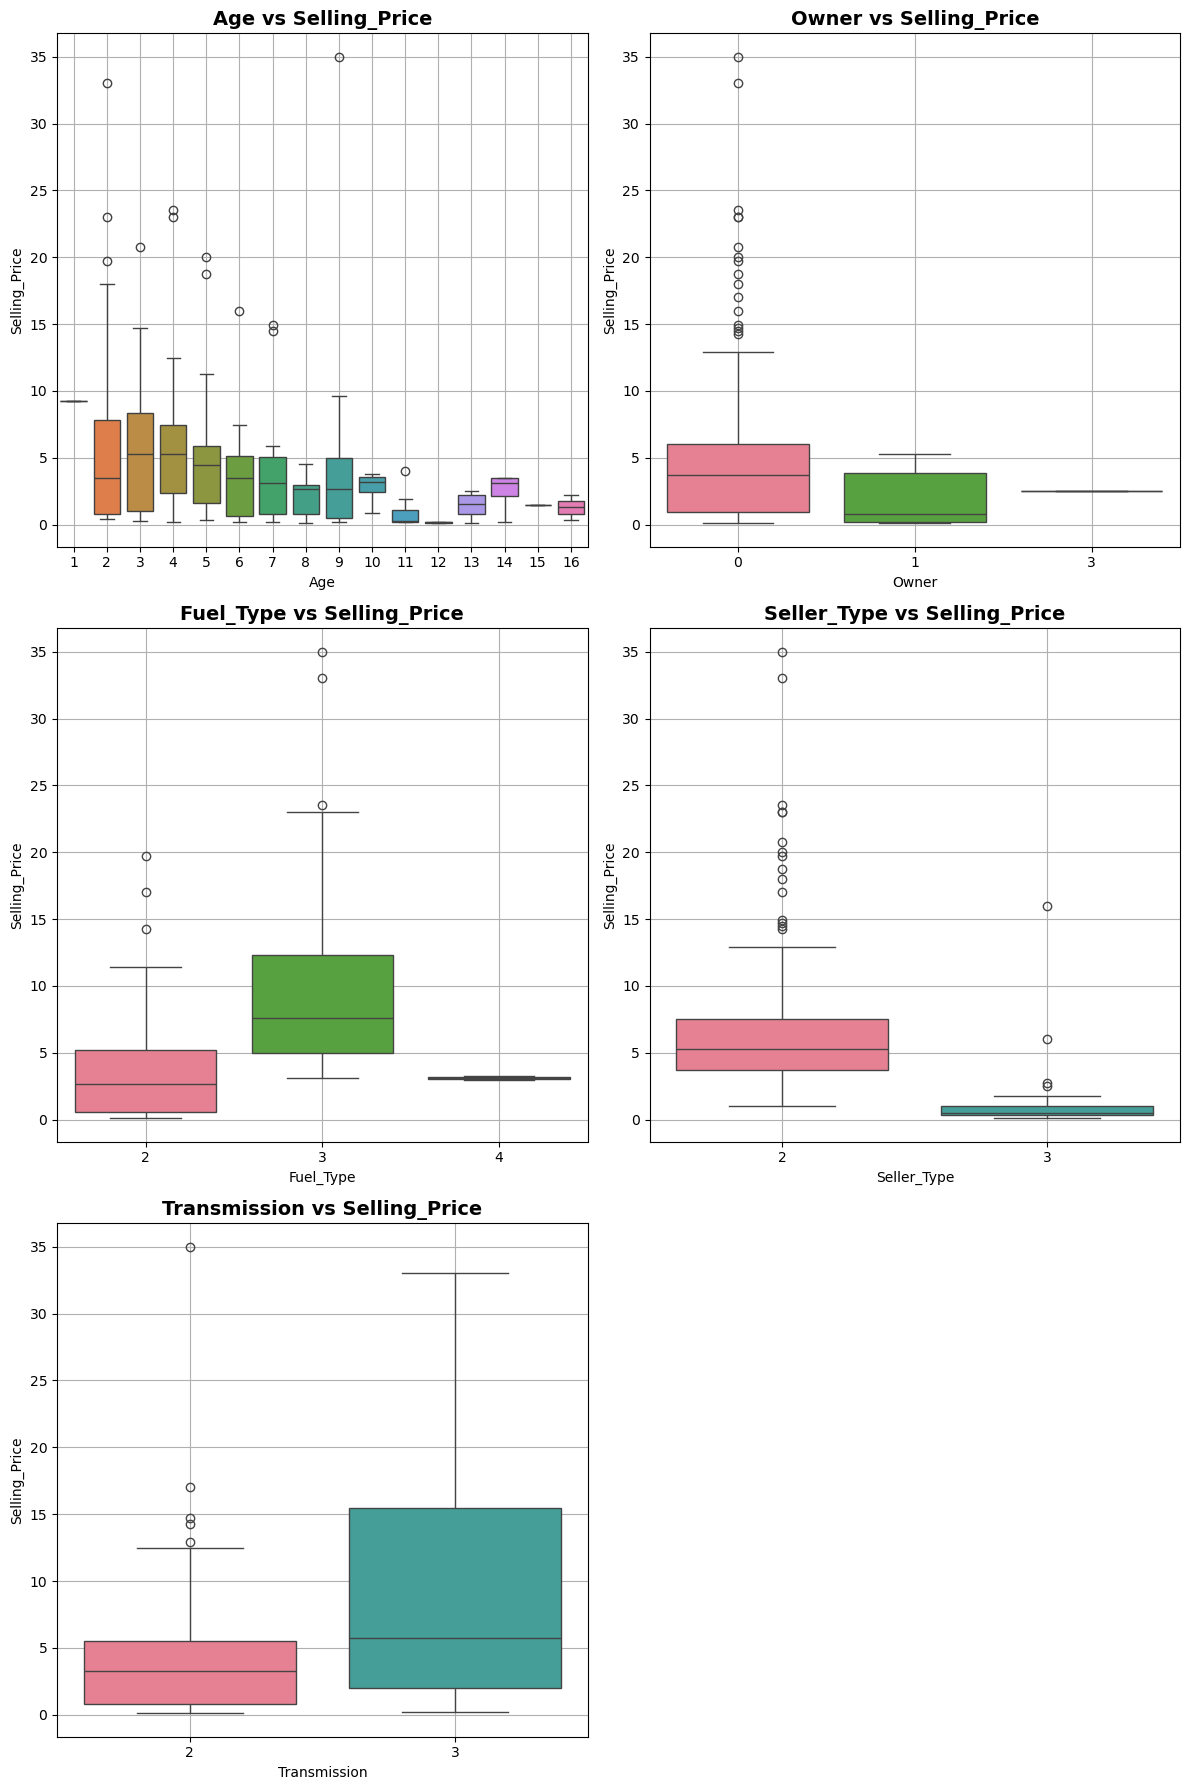

In [13]:
# List of columns to plot and their corresponding titles
columns_to_plot = ['Age', 'Owner', 'Fuel_Type', 'Seller_Type', 'Transmission']
titles = ['Age vs Selling_Price', 'Owner vs Selling_Price', 
          'Fuel_Type vs Selling_Price', 'Seller_Type vs Selling_Price', 
          'Transmission vs Selling_Price']

# Set up the grid layout: 3 rows, 2 columns
n_cols = 2  # Number of plots per row
n_rows = -(-len(columns_to_plot) // n_cols)  # Calculate rows needed using ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6 * n_rows))  # Grid layout and size

# Flatten axes for easy iteration if it's a 2D array
axes = axes.flatten()

# Loop through each column and title, and create the plots
for i, (col, title) in enumerate(zip(columns_to_plot, titles)):
    sns.boxplot(x=df1[col], y=df1['Selling_Price'], ax=axes[i], palette="husl")  # Set colors with 'husl' palette
    axes[i].set_title(title, fontsize=14, fontweight='bold')
    axes[i].grid()

# Hide any unused axes in the grid
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


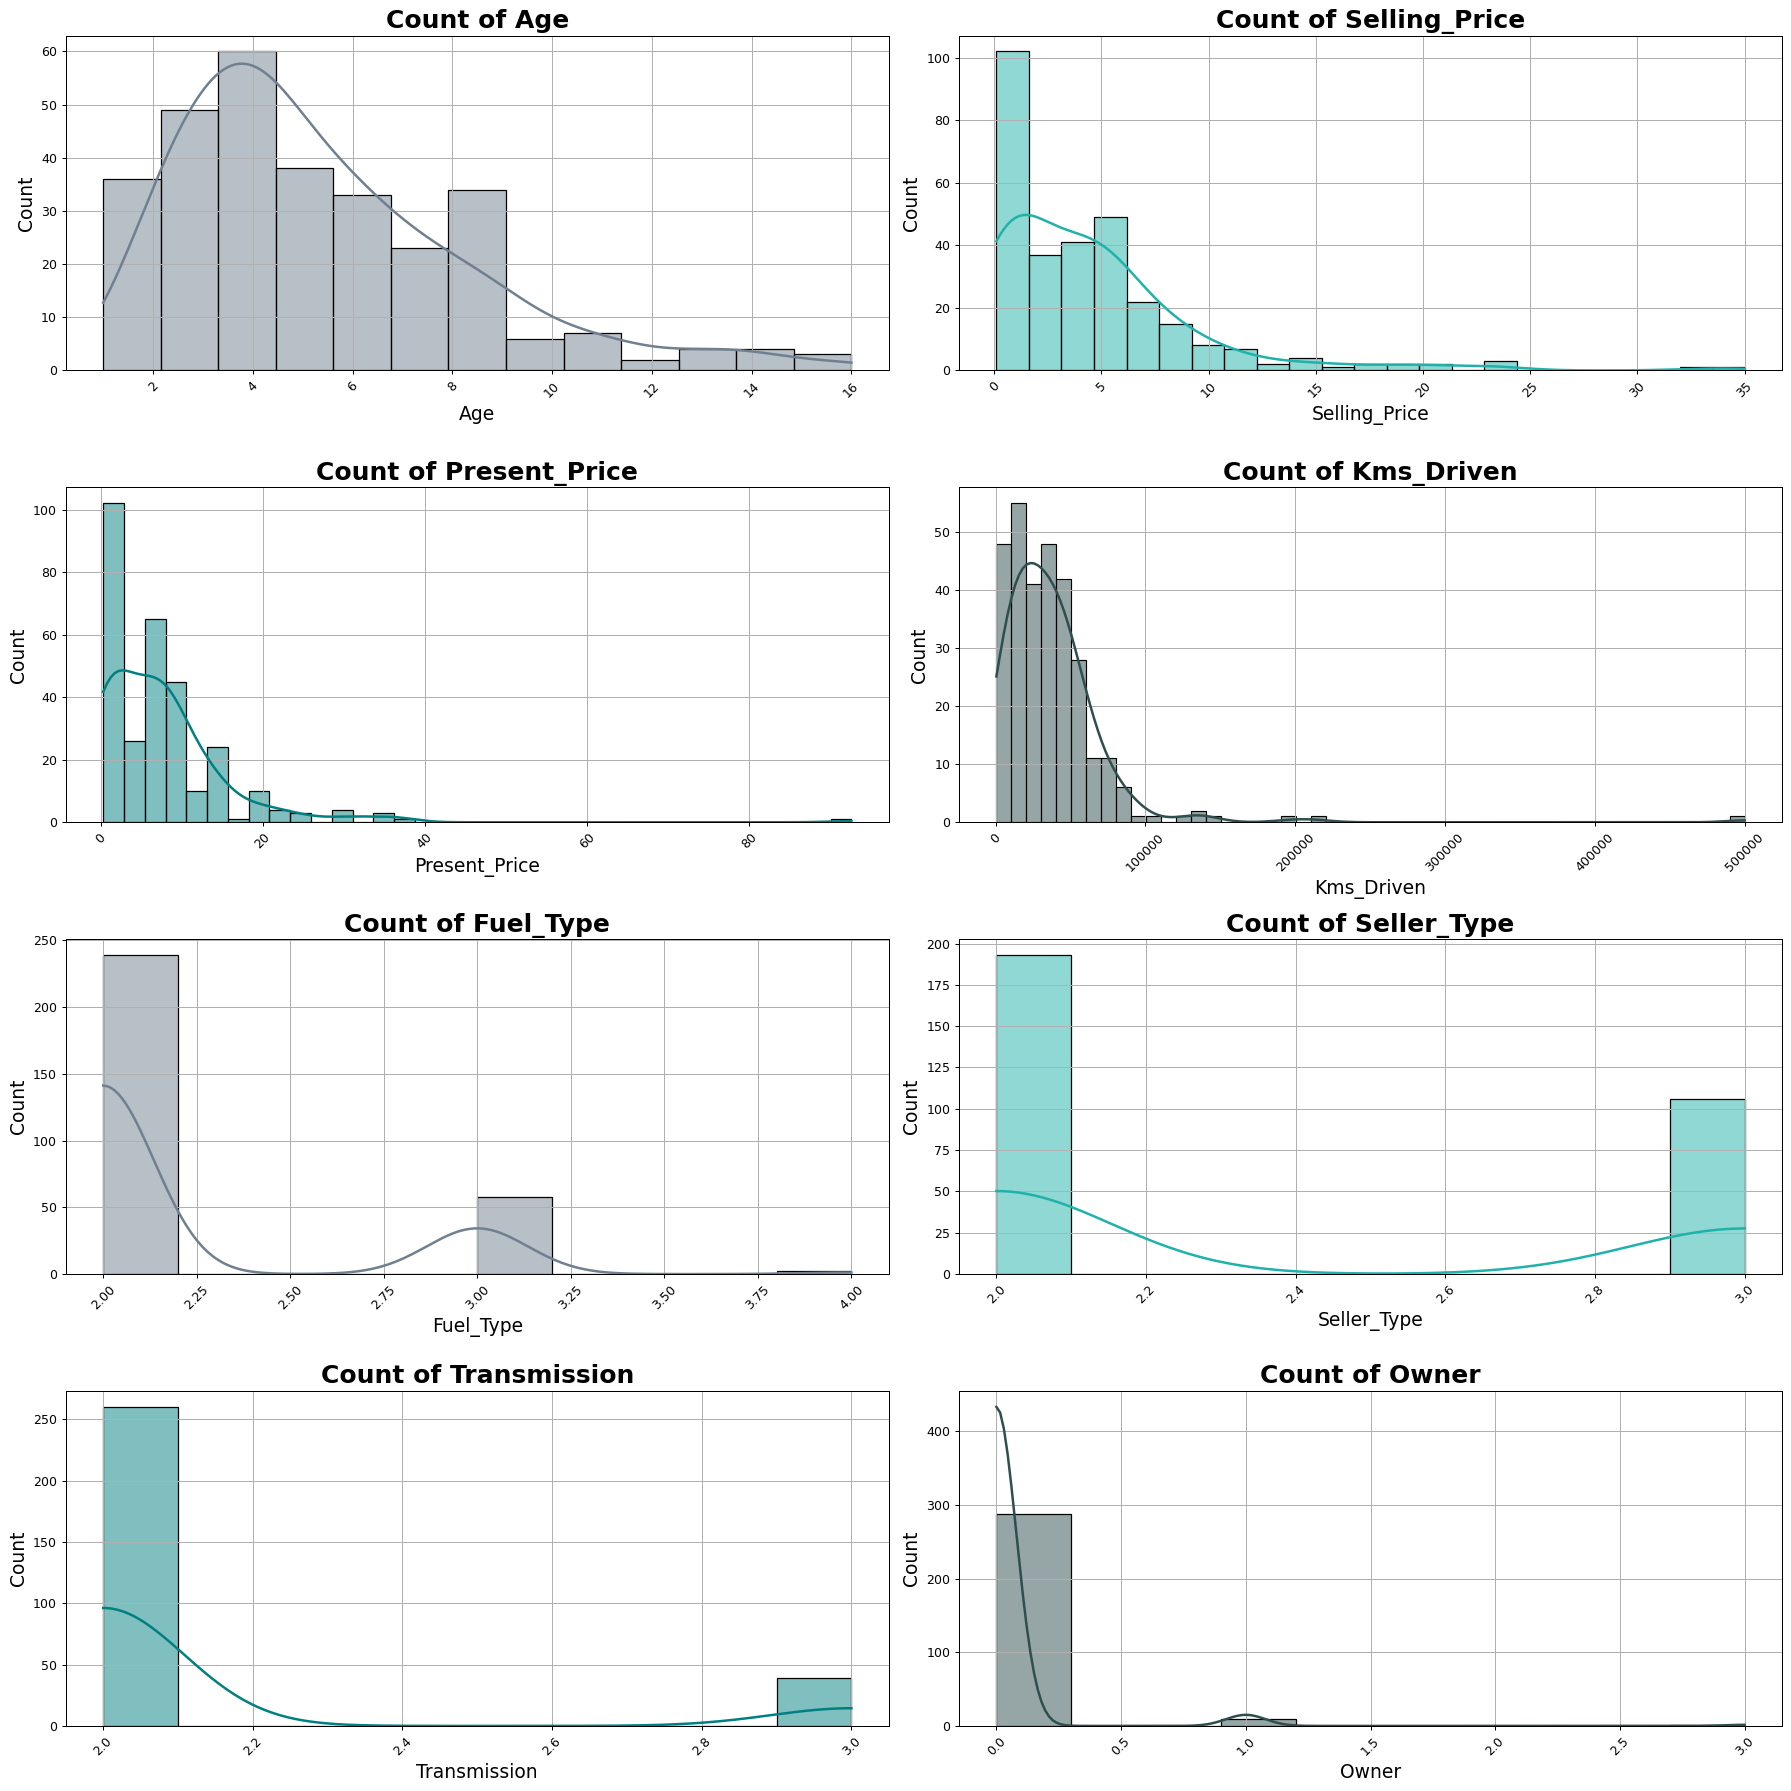

In [14]:
# Define the columns (all columns in df1 are numerical)
columns = df1.columns

# Define a base set of colors
base_colors = ['slategrey', 'lightseagreen', 'teal', 'darkslategrey']

# Repeat colors to match the number of columns
colors = (base_colors * ((len(columns) // len(base_colors)) + 1))[:len(columns)]

# Calculate the number of rows and columns for subplots
num_cols = 2
num_rows = (len(columns) + 1) // num_cols

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, num_rows * 5), dpi=90)

# Flatten axes for easier iteration
axes = axes.flatten()

# Iterate through each column, axis, and color
for ax, column, color in zip(axes, columns, colors):
    sns.histplot(data=df1, x=column, ax=ax, kde=True, color=color, line_kws={'linewidth': 2})
    ax.set_xlabel(column, fontsize=15)
    ax.set_ylabel('Count', fontsize=15)
    ax.set_title(f'Count of {column}', fontsize=20, fontweight='bold')
    ax.tick_params(axis='x', labelrotation=45, labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    ax.grid()

# Hide any unused subplots
for i in range(len(columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Correlation Heatmap')

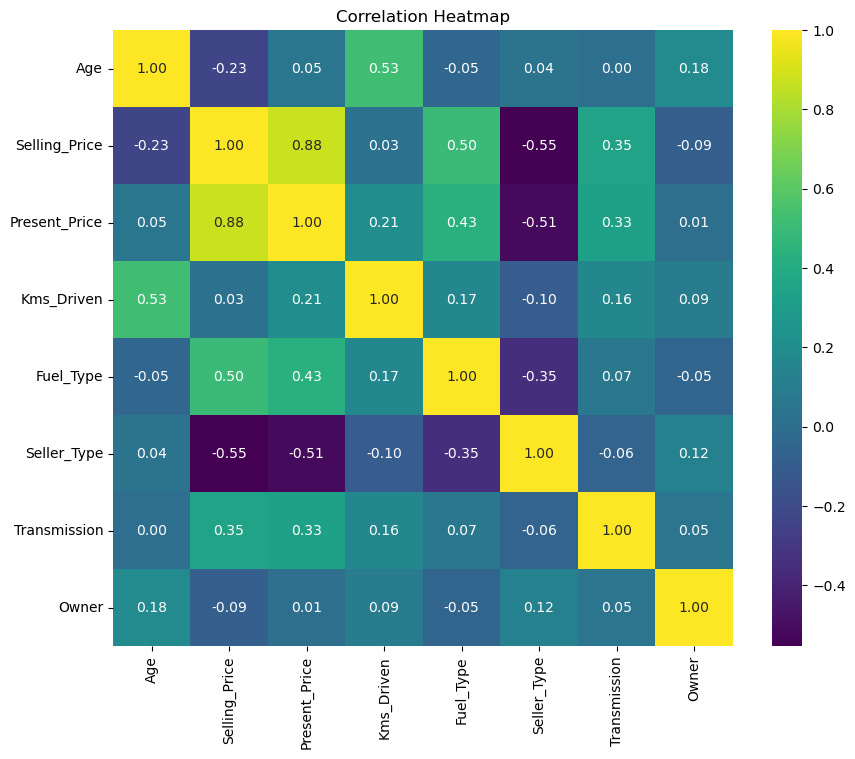

In [15]:
# Calculate the correlation matrix for the DataFrame 'df1'
correlation_matrix = df1.corr()

# Set the size of the heatmap figure
plt.figure(figsize=(10, 8))

# Create a heatmap with correlation values annotated, using the 'coolwarm' color map
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")

plt.title('Correlation Heatmap')

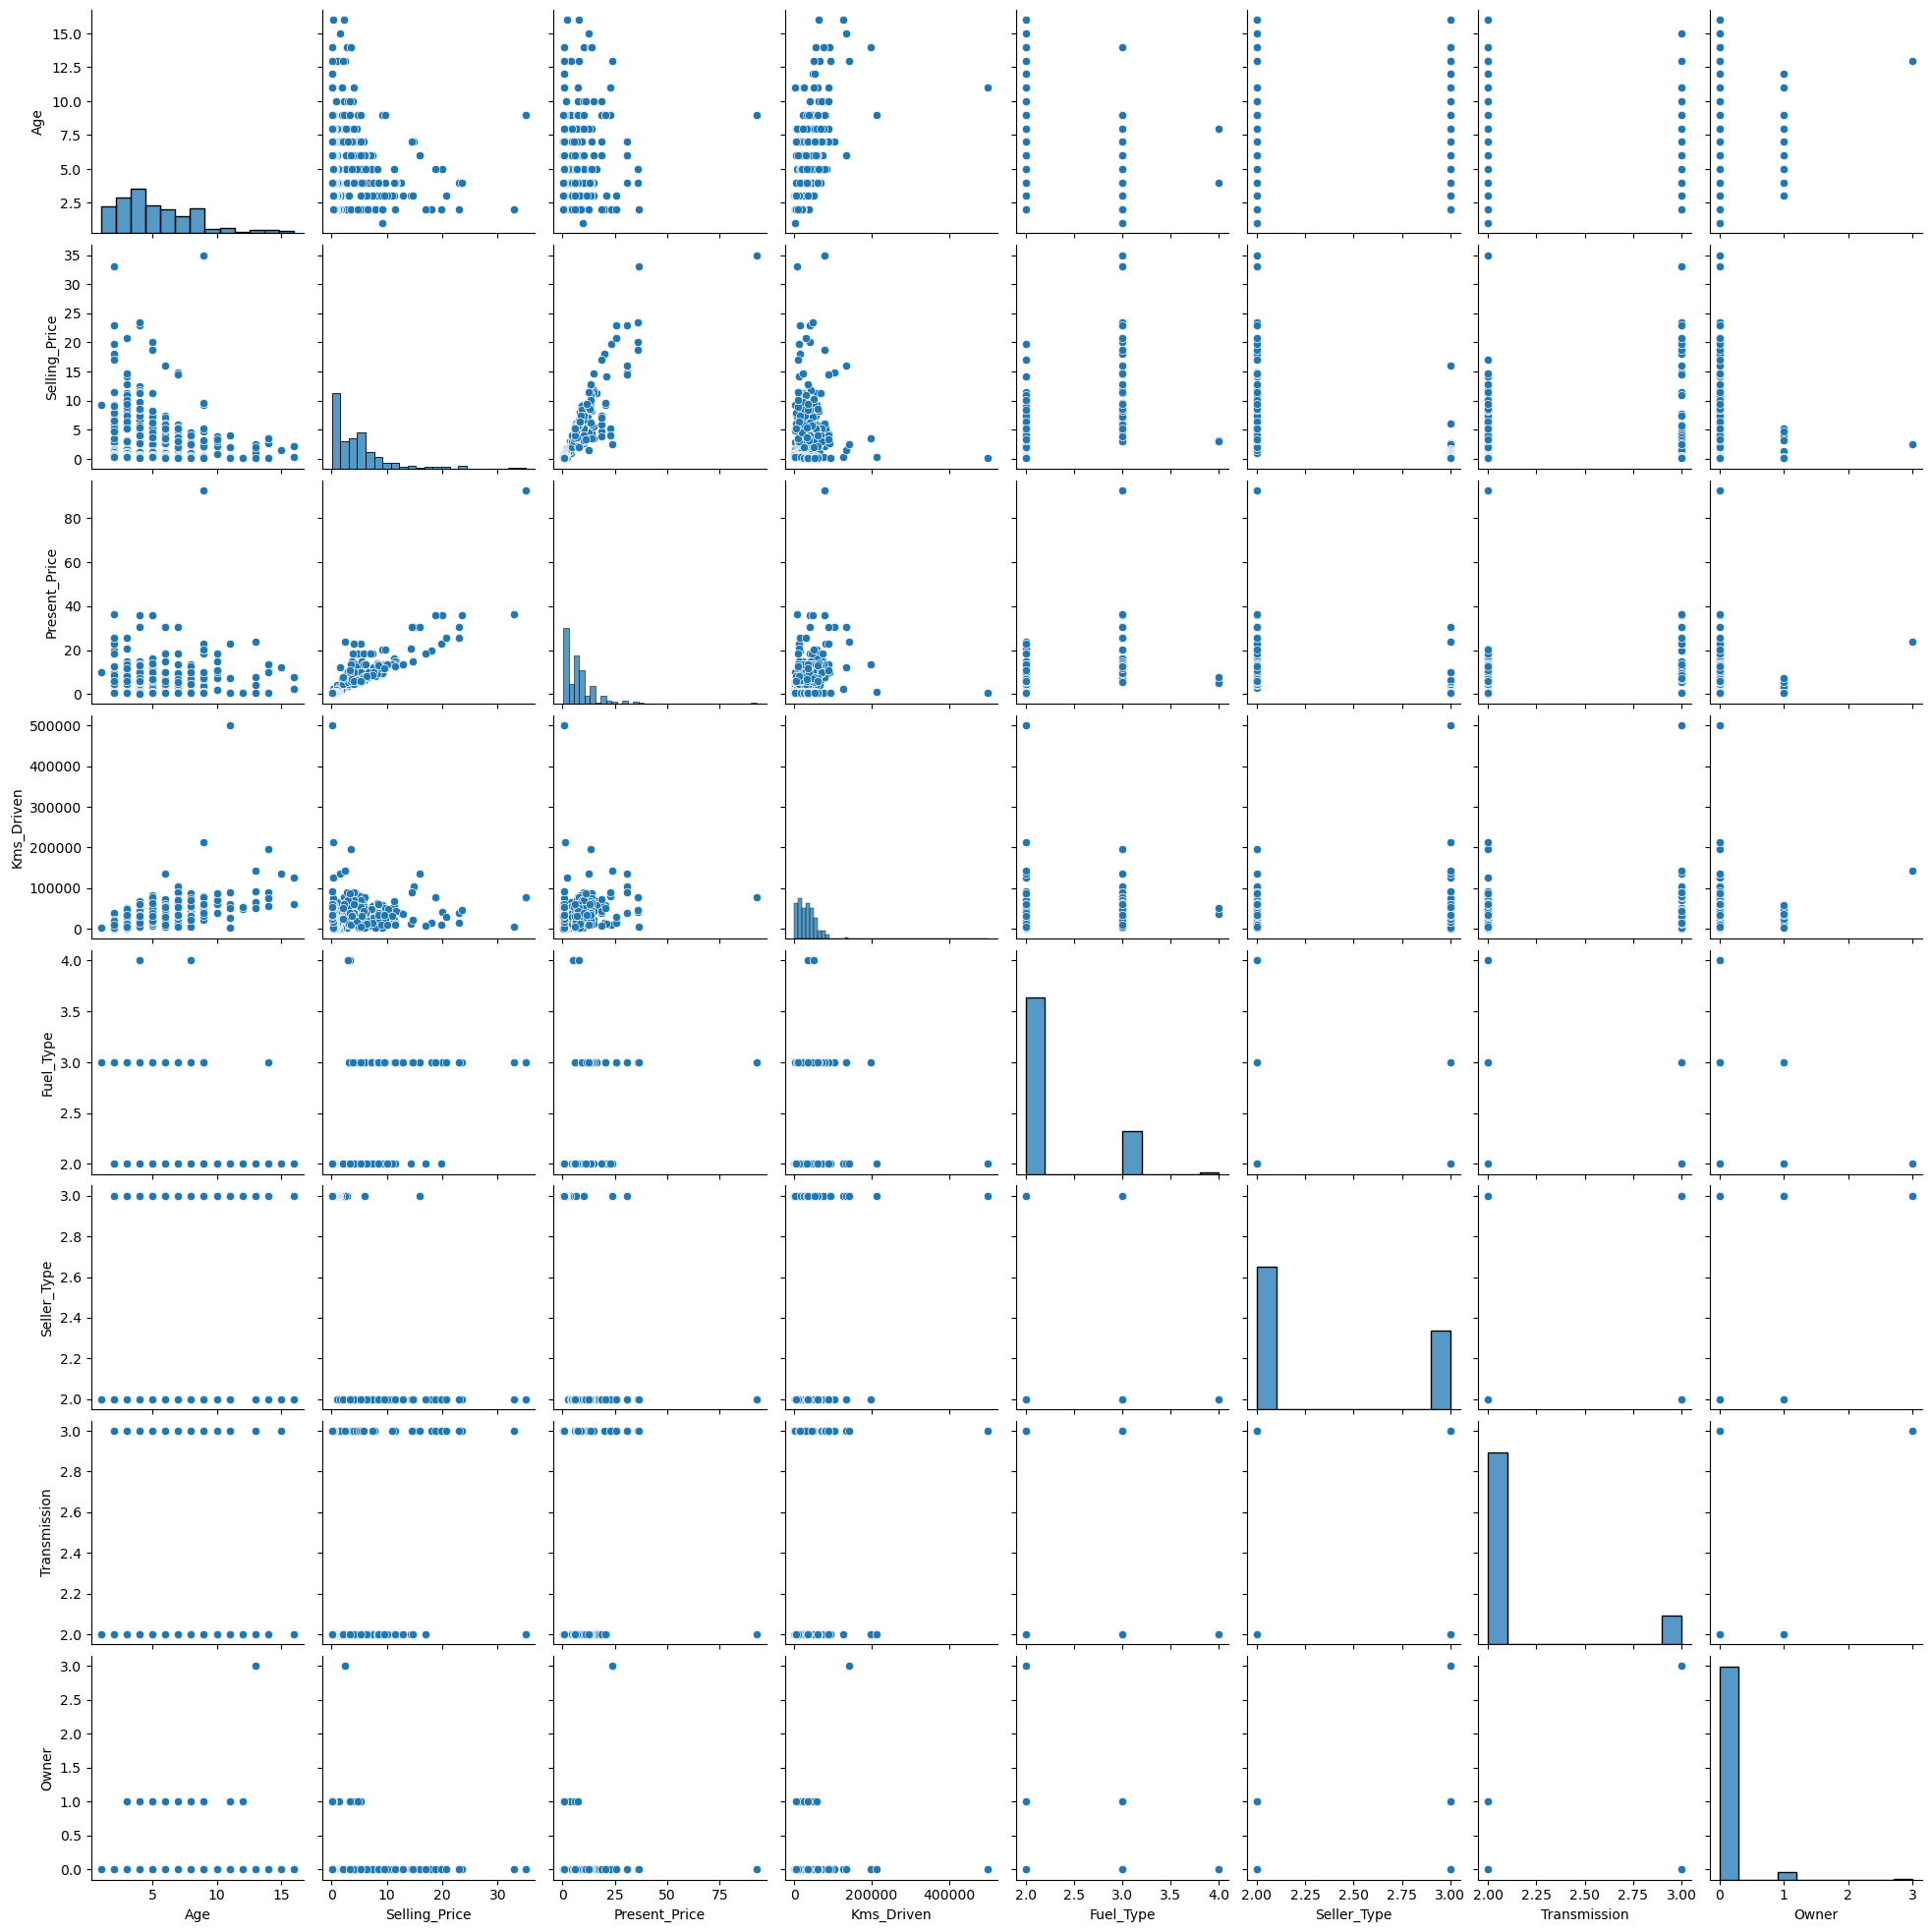

In [16]:
# Create a pair plot using Seaborn
pair_plot = sns.pairplot(df1)
plt.show()

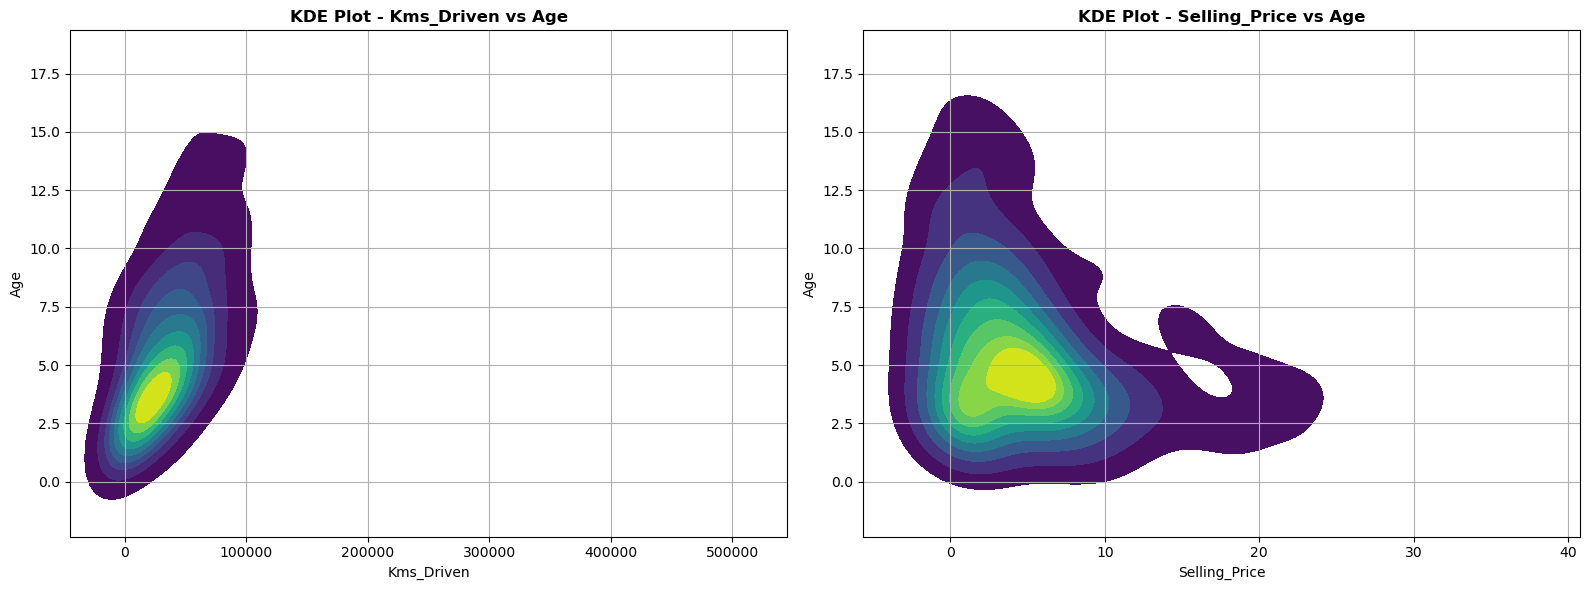

In [17]:
# Set up the figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))  # 1 row, 2 columns

# First KDE plot - 'Kms_Driven' vs 'Age'
sns.kdeplot(x='Kms_Driven', y='Age', data=df1, cmap='viridis', fill=True, ax=axes[0])
axes[0].set_title('KDE Plot - Kms_Driven vs Age', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Kms_Driven')
axes[0].set_ylabel('Age')
axes[0].grid()

# Second KDE plot - 'Selling_Price' vs 'Age'
sns.kdeplot(x='Selling_Price', y='Age', data=df1, cmap='viridis', fill=True, ax=axes[1])
axes[1].set_title('KDE Plot - Selling_Price vs Age', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Selling_Price')
axes[1].set_ylabel('Age')
axes[1].grid()

# Adjust layout for better spacing
plt.tight_layout()
# Display the plots
plt.show()

 <a id="2"></a>
# <p style="padding:10px;background-color:	#CDC9C9 ;margin:0;color:#282828;font-family:Times New Roman;font-size:90%;text-align:left;border-radius: 60px;overflow:auto;font-weight:500;width: 350px;">Normalaizing</p>

In [155]:
df2 = df1.copy()
df2.describe ()

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,5.384615,4.589632,7.541037,36916.752508,2.207358,2.354515,2.130435,0.043478
std,2.896868,4.984240,8.567887,39015.170352,0.422297,0.479168,0.337346,0.248720
min,1.000000,0.100000,0.320000,500.000000,2.000000,2.000000,2.000000,0.000000
25%,3.000000,0.850000,1.200000,15000.000000,2.000000,2.000000,2.000000,0.000000
50%,5.000000,3.510000,6.100000,32000.000000,2.000000,2.000000,2.000000,0.000000
75%,7.000000,6.000000,9.840000,48883.500000,2.000000,3.000000,2.000000,0.000000
max,16.000000,35.000000,92.600000,500000.000000,4.000000,3.000000,3.000000,3.000000


In [156]:
# Define the transformer
transformer = FunctionTransformer(np.log1p)
# Apply the transformation only to the 'Kms_Driven' column
df2['Kms_Driven'] = transformer.transform(df2[['Kms_Driven']])
df2.describe()

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,5.384615,4.589632,7.541037,10.115333,2.207358,2.354515,2.130435,0.043478
std,2.896868,4.984240,8.567887,1.015905,0.422297,0.479168,0.337346,0.248720
min,1.000000,0.100000,0.320000,6.216606,2.000000,2.000000,2.000000,0.000000
25%,3.000000,0.850000,1.200000,9.615872,2.000000,2.000000,2.000000,0.000000
50%,5.000000,3.510000,6.100000,10.373522,2.000000,2.000000,2.000000,0.000000
75%,7.000000,6.000000,9.840000,10.797213,2.000000,3.000000,2.000000,0.000000
max,16.000000,35.000000,92.600000,13.122365,4.000000,3.000000,3.000000,3.000000


 <a id="2"></a>
# <p style="padding:10px;background-color:	#CDC9C9 ;margin:0;color:#282828;font-family:Times New Roman;font-size:90%;text-align:left;border-radius: 60px;overflow:auto;font-weight:350;width: 350px;">Create primary model</p>

In [191]:
# define multivariate x and y
x = pd.DataFrame (df2, columns = ['Age', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'])
y = df2['Selling_Price']

In [158]:
# split train and test
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = 0.3, random_state = 0)

In [159]:
model = LinearRegression ()
model.fit (x_train,y_train )
result = model.score (x_test, y_test )
print (result)

0.8278126062506446


In [162]:
kfold_validation = KFold (10)
result = cross_val_score (model, x, y, cv = kfold_validation )
print (result)

[ 6.56610767e-01  8.80720131e-01  7.36064893e-01  8.26462035e-01
 -5.73727060e+01 -1.00924612e+03  3.55469069e-01  7.68083782e-01
  8.36976106e-01  8.66912936e-01]


In [163]:
len(df2)/10

29.9

In [164]:
x1 = x[x.index > 119]
x2 = x1[x1.index < 179]
xn =pd.concat([x1, x2])
xn.reset_index()

,index,Age,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,120,3,1.260,8.648397,2,3,2,0
1,121,8,1.500,8.839422,2,3,2,0
2,122,3,1.170,8.699681,2,3,2,0
3,123,6,1.470,10.747229,2,3,2,0
4,124,7,1.750,9.350189,2,3,2,0
...,...,...,...,...,...,...,...,...
235,174,4,0.720,10.561033,2,3,2,0
236,175,8,0.787,11.225257,2,3,2,0
237,176,8,1.050,10.308986,2,3,2,0
238,177,3,0.570,10.085851,2,3,3,0


In [165]:
dfn1 = df2[df2.index > 119]
dfn2 = dfn1[dfn1.index < 179]
dfn = pd.concat([dfn1, dfn2])
dfn.reset_index()

,index,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,120,3,1.05,1.260,8.648397,2,3,2,0
1,121,8,1.05,1.500,8.839422,2,3,2,0
2,122,3,1.05,1.170,8.699681,2,3,2,0
3,123,6,1.00,1.470,10.747229,2,3,2,0
4,124,7,0.95,1.750,9.350189,2,3,2,0
...,...,...,...,...,...,...,...,...,...
235,174,4,0.38,0.720,10.561033,2,3,2,0
236,175,8,0.38,0.787,11.225257,2,3,2,0
237,176,8,0.35,1.050,10.308986,2,3,2,0
238,177,3,0.35,0.570,10.085851,2,3,3,0


In [167]:
# Separate features and target
x1 = dfn.drop('Selling_Price', axis=1)
y1 = dfn.Selling_Price.values.reshape(-1, 1)

In [168]:
# split train and test
x_train, x_test, y_train, y_test = train_test_split (x1, y1, test_size = 0.3, random_state = 0)
modeln = LinearRegression ()
modeln.fit (x_train,y_train )
result = modeln.score (x_test, y_test )
print (result)

0.9306469364764525


 <a id="2"></a>
# <p style="padding:10px;background-color:	#CDC9C9 ;margin:0;color:#282828;font-family:Times New Roman;font-size:90%;text-align:left;border-radius: 60px;overflow:auto;font-weight:500;width: 350px;">Change dataset to improve it </p>

In [192]:
def find_best_dimension(max_dimension, testsize):

    # Initialize best R² score
    base_r2 = 0.8278126062506446  # Base R² score
    x_copy = x.copy()  # Copy to avoid modifying the original x
    y_copy = y.copy()

    # Dictionary to store the best dimension for each column
    best_columns = {}

    for column in x_copy.columns:
        print(f"\nTesting column: {column}")
        best_r2 = base_r2  # Reset best R² for the current column
        best_dimension = None
        best_values = None
        
        # Test each dimension for the current column
        for Dimension in range(1, max_dimension + 1):
            Col_Name = f"{column}_D{Dimension}"
            Col_Val = x_copy[column] ** Dimension  # Raise column to 'Dimension'

            # Temporarily add the column
            x_temp = x.copy()
            x_temp[Col_Name] = Col_Val

            # Split data into train and test sets
            x_train, x_test, y_train, y_test = train_test_split(x_temp, y_copy, test_size=testsize, random_state=0)

            # Train and evaluate the model
            model_new = LinearRegression()
            model_new.fit(x_train, y_train)
            y_pred = model_new.predict(x_test)
            r2_new = metrics.r2_score(y_test, y_pred)

            # Update the best dimension for the column
            if r2_new > best_r2:
                best_r2 = r2_new
                best_dimension = Dimension
                best_values = Col_Val  # Save the transformed column values

        # If a better dimension was found, keep it
        if best_dimension is not None:
            Col_Name_Final = f"{column}_D{best_dimension}"
            best_columns[Col_Name_Final] = best_values
            print(f"Best dimension for {column}: {best_dimension} with R² = {best_r2}")
        else:
            print(f"No improvement for {column}")

    # Insert all best-performing features into x
    for col_name, col_values in best_columns.items():
        x[col_name] = col_values

    print("\nFinal R² score after adding best dimensions:")
    print(f"Best features added to x: {list(best_columns.keys())}")

# Call the function
find_best_dimension(max_dimension=2, testsize=0.3)



Testing column: Age
Best dimension for Age: 2 with R² = 0.8314178469951061

Testing column: Present_Price
Best dimension for Present_Price: 2 with R² = 0.836243023163018

Testing column: Kms_Driven
Best dimension for Kms_Driven: 2 with R² = 0.8293170291447203

Testing column: Fuel_Type
Best dimension for Fuel_Type: 2 with R² = 0.8353446826911686

Testing column: Seller_Type
No improvement for Seller_Type

Testing column: Transmission
No improvement for Transmission

Testing column: Owner
Best dimension for Owner: 2 with R² = 0.8346342664649843

Final R² score after adding best dimensions:
Best features added to x: ['Age_D2', 'Present_Price_D2', 'Kms_Driven_D2', 'Fuel_Type_D2', 'Owner_D2']


In [193]:
x

,Age,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_D2,Present_Price_D2,Kms_Driven_D2,Fuel_Type_D2,Owner_D2
0,5,5.59,10.203629,2,2,2,0,25,31.2481,104.114048,4,0
1,6,9.54,10.668979,3,2,2,0,36,91.0116,113.827105,9,0
2,2,9.85,8.839422,2,2,2,0,4,97.0225,78.135374,4,0
3,8,4.15,8.556606,2,2,2,0,64,17.2225,73.215510,4,0
4,5,6.87,10.656106,3,2,2,0,25,47.1969,113.552590,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...
296,3,11.60,10.433792,3,2,2,0,9,134.5600,108.864020,9,0
297,4,5.90,11.002117,2,2,2,0,16,34.8100,121.046568,4,0
298,10,11.00,11.384353,2,2,2,0,100,121.0000,129.603497,4,0
299,2,12.50,9.105091,3,2,2,0,4,156.2500,82.902681,9,0


In [194]:
# Define new feature for emphesis the effect of each feature according to their correlation to target
Prepri_Kms = x['Present_Price']*x['Kms_Driven']
Prepri_fu = x['Present_Price']*x['Fuel_Type']
Prepri_fu2 = x['Present_Price']*x['Fuel_Type_D2']
Prepri_Kms2 = x['Present_Price']*x['Kms_Driven_D2']
Prepri2_Kms = x['Present_Price_D2']*x['Kms_Driven']
Prepri2_Kms2 = x['Present_Price_D2']*x['Kms_Driven_D2']
Prepri2_fu = x['Present_Price_D2']*x['Fuel_Type']
Prepri2_fu2 = x['Present_Price_D2']*x['Fuel_Type_D2']

In [195]:
# Add new feature to dataframe
x.insert (2, "Prepri_Kms", Prepri_Kms)
x.insert (2, "Prepri_fu", Prepri_fu)
x.insert (2, "Prepri_fu2", Prepri_fu2)
x.insert (2, "Prepri_Kms2", Prepri_Kms2)
x.insert (2, "Prepri2_Kms", Prepri2_Kms)
x.insert (2, "Prepri2_Kms2", Prepri2_Kms2)
x.insert (2, "Prepri2_fu", Prepri2_fu)
x.insert (2, "Prepri2_fu2", Prepri2_fu2)

In [196]:
x.describe()

,Age,Present_Price,Prepri2_fu2,Prepri2_fu,Prepri2_Kms2,Prepri2_Kms,Prepri_Kms2,Prepri_fu2,Prepri_fu,Prepri_Kms,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_D2,Present_Price_D2,Kms_Driven_D2,Fuel_Type_D2,Owner_D2
count,299.000000,299.000000,299.000000,299.000000,2.990000e+02,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,5.384615,7.541037,936.278858,343.177454,1.498335e+04,1391.916331,829.662879,45.854147,18.202910,78.840319,10.115333,2.207358,2.354515,2.130435,0.043478,37.357860,130.030405,103.348573,5.050167,0.063545
std,2.896868,8.567887,4754.214828,1585.786651,6.658037e+04,5936.509693,1037.714606,73.689875,24.636617,93.792191,1.015905,0.422297,0.479168,0.337346,0.248720,43.122531,530.614523,19.558136,2.173859,0.548924
min,1.000000,0.320000,0.409600,0.204800,1.121046e+01,1.071425,20.868943,1.280000,0.640000,3.348202,6.216606,2.000000,2.000000,2.000000,0.000000,1.000000,0.102400,38.646191,4.000000,0.000000
25%,3.000000,1.200000,5.760000,2.880000,1.372958e+02,14.111752,109.750111,4.800000,2.400000,11.711607,9.615872,2.000000,2.000000,2.000000,0.000000,9.000000,1.440000,92.464997,4.000000,0.000000
50%,5.000000,6.100000,184.416400,92.208200,4.208385e+03,393.766919,641.287222,27.160000,13.580000,64.872065,10.373522,2.000000,2.000000,2.000000,0.000000,25.000000,37.210000,107.609968,4.000000,0.000000
75%,7.000000,9.840000,638.639450,239.432550,1.057599e+04,973.329446,1091.122278,54.600000,25.265000,102.837984,10.797213,2.000000,3.000000,2.000000,0.000000,49.000000,96.825700,116.579810,4.000000,0.000000
max,16.000000,92.600000,77172.840000,25724.280000,1.088038e+06,96590.186167,11749.869583,833.400000,277.800000,1043.090563,13.122365,4.000000,3.000000,3.000000,3.000000,256.000000,8574.760000,172.196473,16.000000,9.000000


 <a id="2"></a>
# <p style="padding:10px;background-color:	#CDC9C9 ;margin:0;color:#282828;font-family:Times New Roman;font-size:90%;text-align:left;border-radius: 60px;overflow:auto;font-weight:500;width: 250px;">Create model2</p>

In [197]:
# split train and test
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = 0.3, random_state = 0)

In [198]:
model = LinearRegression ()
model.fit (x_train,y_train )
result = model.score (x_test, y_test )
print (result)

0.7724974136054498


In [201]:
kfold_validation = KFold (10)
result = cross_val_score (model, x, y, cv = kfold_validation )
print (result)

[   0.85337681    0.89647748    0.62410599    0.95795425  -16.01049448
 -133.37464266    0.87241327    0.82180695    0.85650128    0.89744235]


In [202]:
x1n = x[x.index > 119]
x2n = x1n[x1n.index < 179]
xn2 =pd.concat([x1n, x2n])
xn2.reset_index()

,index,Age,Present_Price,Prepri2_fu2,Prepri2_fu,Prepri2_Kms2,Prepri2_Kms,Prepri_Kms2,Prepri_fu2,Prepri_fu,...,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_D2,Present_Price_D2,Kms_Driven_D2,Fuel_Type_D2,Owner_D2
0,120,3,1.260,6.350400,3.175200,118.744175,13.730195,94.241408,5.040,2.520,...,8.648397,2,3,2,0,9,1.587600,74.794769,4,0
1,121,8,1.500,9.000000,4.500000,175.804592,19.888699,117.203062,6.000,3.000,...,8.839422,2,3,2,0,64,2.250000,78.135374,4,0
2,122,3,1.170,5.475600,2.737800,103.604452,11.908994,88.550814,4.680,2.340,...,8.699681,2,3,2,0,9,1.368900,75.684456,4,0
3,123,6,1.470,8.643600,4.321800,249.590288,23.223687,169.789312,5.880,2.940,...,10.747229,2,3,2,0,36,2.160900,115.502933,4,0
4,124,7,1.750,12.250000,6.125000,267.742245,28.634955,152.995569,7.000,3.500,...,9.350189,2,3,2,0,49,3.062500,87.426039,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,174,4,0.720,2.073600,1.036800,57.819966,5.474840,80.305508,2.880,1.440,...,10.561033,2,3,2,0,16,0.518400,111.535428,4,0
236,175,8,0.787,2.477476,1.238738,78.044451,6.952576,99.167028,3.148,1.574,...,11.225257,2,3,2,0,64,0.619369,126.006389,4,0
237,176,8,1.050,4.410000,2.205000,117.168399,11.365657,111.588952,4.200,2.100,...,10.308986,2,3,2,0,64,1.102500,106.275192,4,0
238,177,3,0.570,1.299600,0.649800,33.050253,3.276893,57.982900,2.280,1.140,...,10.085851,2,3,3,0,9,0.324900,101.724386,4,0


In [203]:
dfn1 = df2[df2.index > 119]
dfn2 = dfn1[dfn1.index < 179]
dfn = pd.concat([dfn1, dfn2])
dfn.reset_index()

,index,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,120,3,1.05,1.260,8.648397,2,3,2,0
1,121,8,1.05,1.500,8.839422,2,3,2,0
2,122,3,1.05,1.170,8.699681,2,3,2,0
3,123,6,1.00,1.470,10.747229,2,3,2,0
4,124,7,0.95,1.750,9.350189,2,3,2,0
...,...,...,...,...,...,...,...,...,...
235,174,4,0.38,0.720,10.561033,2,3,2,0
236,175,8,0.38,0.787,11.225257,2,3,2,0
237,176,8,0.35,1.050,10.308986,2,3,2,0
238,177,3,0.35,0.570,10.085851,2,3,3,0


In [204]:
# Separate features and target
x2 = xn2
y2 = dfn.Selling_Price.values.reshape(-1, 1)

In [205]:
# split train and test
x_train, x_test, y_train, y_test = train_test_split (xn2, y2, test_size = 0.2, random_state = 0)
modeln = LinearRegression ()
modeln.fit (x_train,y_train )
y_pred = modeln.predict(x_test)
result = modeln.score (x_test, y_test )
print (result)

0.9654117669989243


 <a id="2"></a>
# <p style="padding:10px;background-color:	#CDC9C9 ;margin:0;color:#282828;font-family:Times New Roman;font-size:90%;text-align:left;border-radius: 60px;overflow:auto;font-weight:500;width: 350px;">Check quality of model2</p>

In [207]:
# add y test and y pred into x test data frame
x_test.insert (0, "y_test", y_test)
x_test.insert (1, "y_pred", y_pred)
x_test

,y_test,y_pred,Age,Present_Price,Prepri2_fu2,Prepri2_fu,Prepri2_Kms2,Prepri2_Kms,Prepri_Kms2,Prepri_fu2,...,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_D2,Present_Price_D2,Kms_Driven_D2,Fuel_Type_D2,Owner_D2
229,3.10,4.399576,7,6.790,414.936900,138.312300,5439.054794,500.762145,801.038998,61.110,...,10.861553,3,2,2,0,49,46.104100,117.973343,9,0
191,0.20,0.045423,7,0.570,1.299600,0.649800,33.318322,3.290155,58.453197,2.280,...,10.126671,2,3,2,1,49,0.324900,102.549468,4,1
157,0.48,0.697736,4,0.840,2.822400,1.411200,71.172273,7.086548,84.728896,3.360,...,10.043293,2,3,2,0,16,0.705600,100.867734,4,0
194,0.20,-0.094957,11,0.787,2.477476,1.238738,72.508312,6.701448,92.132543,3.148,...,10.819798,2,3,2,0,121,0.619369,117.068035,4,0
228,4.95,5.982814,7,9.400,795.240000,265.080000,10695.674718,972.147015,1137.837736,84.600,...,11.002117,3,2,2,0,49,88.360000,121.046568,9,0
166,0.45,0.149992,3,0.550,1.210000,0.605000,14.438595,2.089898,26.251991,2.200,...,6.908755,2,3,2,0,9,0.302500,47.730893,4,0
276,8.65,9.286449,4,13.600,739.840000,369.920000,18937.473691,1871.543516,1392.461301,54.400,...,10.118639,2,2,2,0,16,184.960000,102.386860,4,0
159,0.45,0.996787,2,0.510,1.040400,0.520200,17.893685,2.157347,35.085657,2.040,...,8.294300,2,3,3,0,4,0.260100,68.795406,4,0
272,7.50,6.618496,4,10.000,400.000000,200.000000,10456.304430,1022.560728,1045.630443,40.000,...,10.225607,2,2,2,0,16,100.000000,104.563044,4,0
133,0.72,0.798433,3,0.950,3.610000,1.805000,34.878188,5.610487,36.713882,3.800,...,6.216606,2,3,2,0,9,0.902500,38.646191,4,0


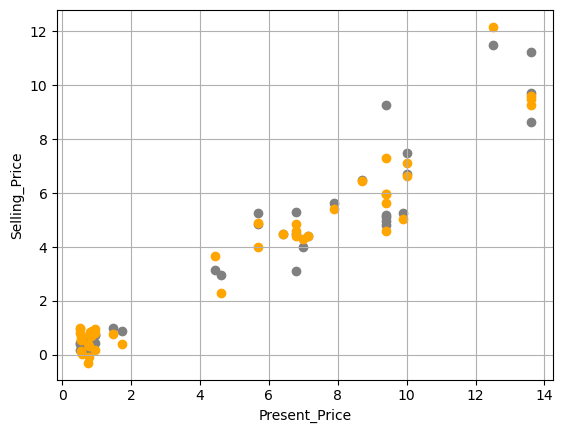

In [206]:
# check our model with plot
a = x_test.Present_Price
b = y_test
c = x_test.Present_Price
d = y_pred

plt.scatter (a, b, color = 'gray')
plt.scatter (c, d, color = 'orange')
plt.xlabel ('Present_Price')
plt.ylabel ('Selling_Price')
plt.grid ()
plt.show ()

In [219]:
# sort your data
dfn = x_test.sort_values (by = ['Present_Price'])
dfn

,y_test,y_pred,Age,Present_Price,Prepri2_fu2,Prepri2_fu,Prepri2_Kms2,Prepri2_Kms,Prepri_Kms2,Prepri_fu2,...,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_D2,Present_Price_D2,Kms_Driven_D2,Fuel_Type_D2,Owner_D2
173,0.40,0.804465,2,0.510,1.040400,0.520200,13.374769,1.865148,26.225037,2.040,...,7.170888,2,3,3,0,4,0.260100,51.421642,4,0
159,0.45,0.996787,2,0.510,1.040400,0.520200,17.893685,2.157347,35.085657,2.040,...,8.294300,2,3,3,0,4,0.260100,68.795406,4,0
196,0.17,0.952354,11,0.520,1.081600,0.540800,46.561926,3.548288,89.542166,2.080,...,13.122365,2,3,3,0,121,0.270400,172.196473,4,0
164,0.45,0.596360,3,0.540,1.166400,0.583200,26.577297,2.783871,49.217217,2.160,...,9.546884,2,3,2,0,9,0.291600,91.142995,4,0
165,0.45,0.534009,3,0.540,1.166400,0.583200,11.269229,1.812762,20.868943,2.160,...,6.216606,2,3,3,0,9,0.291600,38.646191,4,0
158,0.48,0.687320,2,0.540,1.166400,0.583200,23.933643,2.641789,44.321560,2.160,...,9.059634,2,3,2,0,4,0.291600,82.076964,4,0
166,0.45,0.149992,3,0.550,1.210000,0.605000,14.438595,2.089898,26.251991,2.200,...,6.908755,2,3,2,0,9,0.302500,47.730893,4,0
191,0.20,0.045423,7,0.570,1.299600,0.649800,33.318322,3.290155,58.453197,2.280,...,10.126671,2,3,2,1,49,0.324900,102.549468,4,1
135,0.65,0.406087,4,0.740,2.190400,1.095200,39.726182,4.664125,53.684030,2.960,...,8.517393,2,3,2,0,16,0.547600,72.545986,4,0
184,0.25,-0.295472,11,0.750,2.250000,1.125000,58.131745,5.718313,77.508994,3.000,...,10.165890,2,3,2,1,121,0.562500,103.345325,4,1


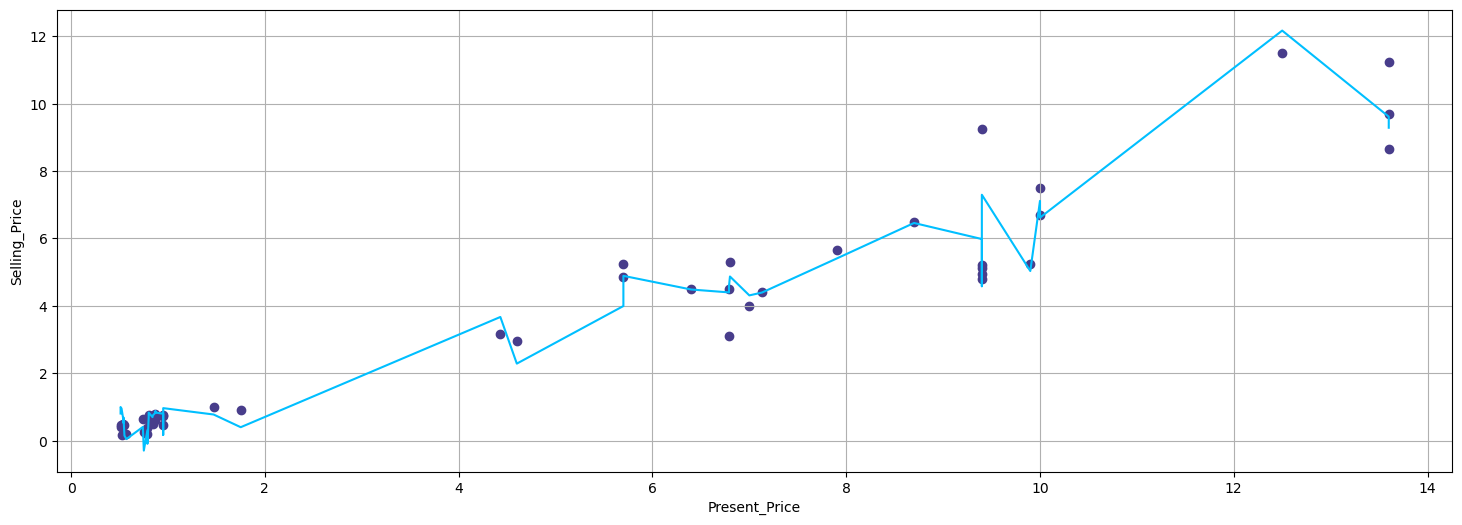

In [220]:
# check our model with plot
# define variable
a = dfn.Present_Price
b = dfn.y_test
c = dfn.Present_Price
d = dfn.y_pred
# draw a plot
plt.figure (figsize = (18, 6)) 
plt.scatter (a, b, color = 'darkslateblue')
plt.plot (c, d, color = 'deepskyblue')
plt.xlabel ('Present_Price')
plt.ylabel ('Selling_Price')
plt.grid ()
plt.savefig ('D:\Machin Learning\practice\M.L\pro16/m2-pp-l',bbox_inches='tight') # Get the location for saving figures

plt.show ()

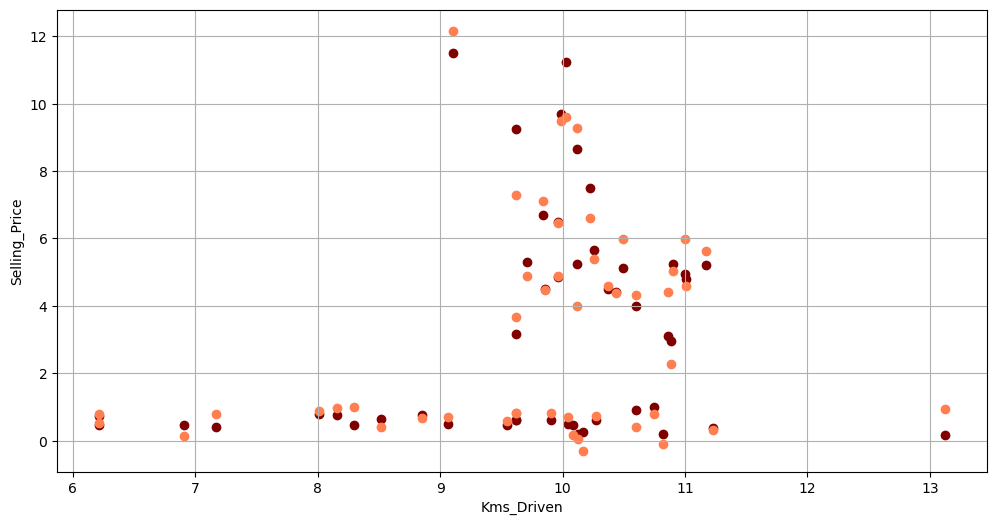

In [211]:
# check our model with plot
# define variable
a = x_test.Kms_Driven
b = y_test
c = x_test.Kms_Driven
d = y_pred
# draw a plot
plt.figure (figsize = (12, 6)) 
plt.scatter (a, b, color = 'maroon')
plt.scatter (c, d, color = 'coral')
plt.xlabel ('Kms_Driven')
plt.ylabel ('Selling_Price')
plt.grid ()
plt.savefig ('D:\Machin Learning\practice\M.L\pro16/m1-kms',bbox_inches='tight') # Get the location for saving figures
plt.show ()

In [212]:
# sort your data
dfn = x_test.sort_values (by = ['Kms_Driven'])
dfn 

,y_test,y_pred,Age,Present_Price,Prepri2_fu2,Prepri2_fu,Prepri2_Kms2,Prepri2_Kms,Prepri_Kms2,Prepri_fu2,...,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_D2,Present_Price_D2,Kms_Driven_D2,Fuel_Type_D2,Owner_D2
133,0.72,0.798433,3,0.950,3.610000,1.805000,34.878188,5.610487,36.713882,3.800,...,6.216606,2,3,2,0,9,0.902500,38.646191,4,0
165,0.45,0.534009,3,0.540,1.166400,0.583200,11.269229,1.812762,20.868943,2.160,...,6.216606,2,3,3,0,9,0.291600,38.646191,4,0
166,0.45,0.149992,3,0.550,1.210000,0.605000,14.438595,2.089898,26.251991,2.200,...,6.908755,2,3,2,0,9,0.302500,47.730893,4,0
173,0.40,0.804465,2,0.510,1.040400,0.520200,13.374769,1.865148,26.225037,2.040,...,7.170888,2,3,3,0,4,0.260100,51.421642,4,0
128,0.80,0.869202,2,0.870,3.027600,1.513800,48.522784,6.060272,55.773315,3.480,...,8.006701,2,3,2,0,4,0.756900,64.107258,4,0
132,0.75,0.964317,2,0.950,3.610000,1.805000,60.105345,7.365126,63.268785,3.800,...,8.160804,2,3,2,0,4,0.902500,66.598721,4,0
159,0.45,0.996787,2,0.510,1.040400,0.520200,17.893685,2.157347,35.085657,2.040,...,8.294300,2,3,3,0,4,0.260100,68.795406,4,0
135,0.65,0.406087,4,0.740,2.190400,1.095200,39.726182,4.664125,53.684030,2.960,...,8.517393,2,3,2,0,16,0.547600,72.545986,4,0
127,0.75,0.681531,3,0.800,2.560000,1.280000,50.169549,5.666437,62.711937,3.200,...,8.853808,2,3,2,0,9,0.640000,78.389921,4,0
158,0.48,0.687320,2,0.540,1.166400,0.583200,23.933643,2.641789,44.321560,2.160,...,9.059634,2,3,2,0,4,0.291600,82.076964,4,0


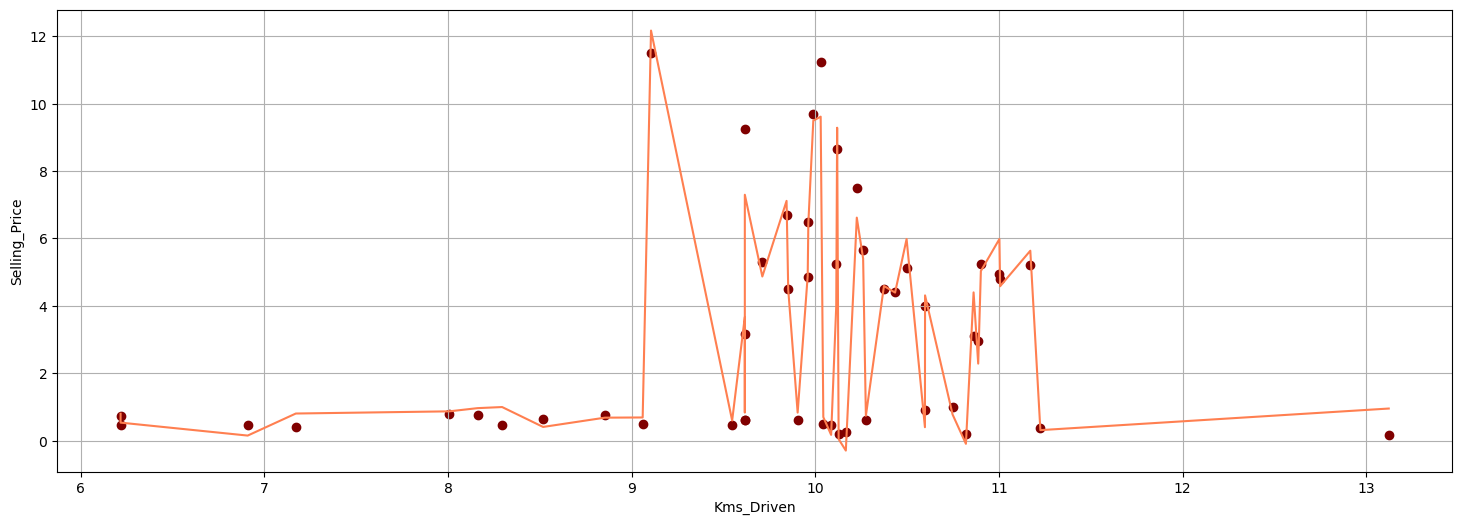

In [213]:
# check our model with plot
# define variable
a = dfn.Kms_Driven
b = dfn.y_test
c = dfn.Kms_Driven
d = dfn.y_pred
# draw a plot
plt.figure (figsize = (18, 6)) 
plt.scatter (a, b, color = 'maroon')
plt.plot (c, d, color = 'coral')
plt.xlabel ('Kms_Driven')
plt.ylabel ('Selling_Price')
plt.grid ()
plt.show ()

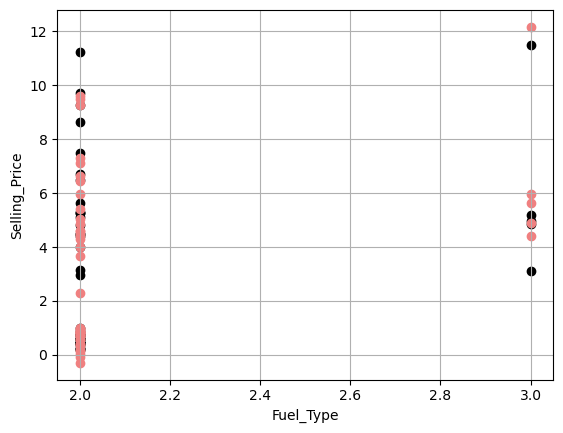

In [215]:
# check our model with plot
# define variable
a = x_test.Fuel_Type
b = y_test
c = x_test.Fuel_Type
d = y_pred
# draw a plot
plt.scatter (a, b, color = 'black')
plt.scatter (c, d, color = 'lightcoral')
plt.xlabel ('Fuel_Type')
plt.ylabel ('Selling_Price')
plt.grid ()
plt.show ()

In [216]:
# sort your data
dfn = x_test.sort_values (by = ['Fuel_Type'])
dfn 

,y_test,y_pred,Age,Present_Price,Prepri2_fu2,Prepri2_fu,Prepri2_Kms2,Prepri2_Kms,Prepri_Kms2,Prepri_fu2,...,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_D2,Present_Price_D2,Kms_Driven_D2,Fuel_Type_D2,Owner_D2
242,4.40,4.394631,5,7.130,203.347600,101.673800,5534.683782,530.439597,776.252985,28.520,...,10.434145,2,2,2,0,25,50.836900,108.871386,4,0
142,0.60,0.737136,4,0.840,2.822400,1.411200,74.495402,7.250100,88.685002,3.360,...,10.275086,2,3,2,0,16,0.705600,105.577384,4,0
138,0.60,0.831938,3,0.870,3.027600,1.513800,69.986756,7.278254,80.444547,3.480,...,9.615872,2,3,2,0,9,0.756900,92.464997,4,0
217,3.15,3.669899,3,4.430,78.499600,39.249800,1814.616322,188.710529,409.619937,17.720,...,9.615872,2,2,2,0,9,19.624900,92.464997,4,0
132,0.75,0.964317,2,0.950,3.610000,1.805000,60.105345,7.365126,63.268785,3.800,...,8.160804,2,3,2,0,4,0.902500,66.598721,4,0
286,5.65,5.403034,3,7.900,249.640000,124.820000,6569.894984,640.333621,831.632276,31.600,...,10.260112,2,2,2,0,9,62.410000,105.269908,4,0
175,0.38,0.311297,8,0.787,2.477476,1.238738,78.044451,6.952576,99.167028,3.148,...,11.225257,2,3,2,0,64,0.619369,126.006389,4,0
164,0.45,0.596360,3,0.540,1.166400,0.583200,26.577297,2.783871,49.217217,2.160,...,9.546884,2,3,2,0,9,0.291600,91.142995,4,0
269,6.70,7.115279,4,10.000,400.000000,200.000000,9688.767109,984.315351,968.876711,40.000,...,9.843154,2,2,2,0,16,100.000000,96.887671,4,0
264,4.00,4.310512,4,7.000,196.000000,98.000000,5502.845469,519.268166,786.120781,28.000,...,10.597310,2,2,2,0,16,49.000000,112.302969,4,0


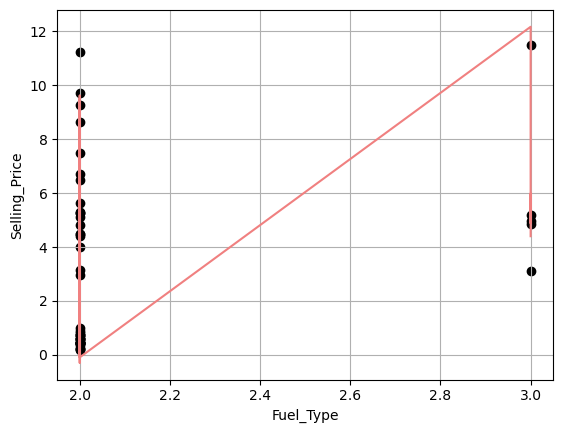

In [217]:
# check our model with plot
# define variable
a = dfn.Fuel_Type
b = dfn.y_test
c = dfn.Fuel_Type
d = dfn.y_pred
# draw a plot
plt.scatter (a, b, color = 'black')
plt.plot (c, d, color = 'lightcoral')
plt.xlabel ('Fuel_Type')
plt.ylabel ('Selling_Price')
plt.grid ()
plt.show ()


<p style="text-align:center;"><span style="font-size:48px;"><span style="color:crimson;"><span style="font-family:cursive;"> The End! </span> </span>  </span></p>